In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error

## Reading and Understanding the dataset

In [3]:
df = pd.read_csv("train.csv")
df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
round(df.isnull().sum()/len(df),2)

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.18
LotArea          0.00
                 ... 
MoSold           0.00
YrSold           0.00
SaleType         0.00
SaleCondition    0.00
SalePrice        0.00
Length: 81, dtype: float64

There might be some null values which need to be checked.

In [8]:
round(100*df.isnull().sum()[(df.isnull().sum()>0)]/len(df), 2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

Dropping the columns with more than 85% null values

In [9]:
df.drop(["Alley", "PoolQC", "MiscFeature"], axis=1, inplace=True)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... 3SsnPorch ScreenPorch PoolArea Fence MiscVal  \
0    AllPub    Inside  ...         0           0        0   NaN       0   
1    AllPub       FR2  ...         0           0        0   NaN       0   
2    AllPub    Inside  ...         0           0        0   NaN       0   
3    AllPub    Corner  ...         0           0        0   NaN       0   
4    AllPub       FR2  ...         0           0        0   NaN       0   

  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0      2    2008        WD         Normal     208500  
1      5    2007        WD         Normal     181500  
2      9    2008        WD         Normal     223500  
3      2    2006        WD        Abnorml     140000  
4     12    2008        WD         Normal     250000  

[5 rows x 78 columns]

In [10]:
#Checking Value counts for each columns
for col in df:
    print(col + " values: ")
    print(df[col].value_counts() , "\n\n")

Id values: 
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64 


MSSubClass values: 
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 


MSZoning values: 
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 


LotFrontage values: 
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64 


LotArea values: 
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64 


Street values: 
Pave    1454
Grvl       6
Name: Street, dtype: int64 


LotShape va

In [11]:
print(df.shape)
#check the duplicate reords
print(df.duplicated(subset=None, keep='first').count())

(1460, 78)
1460


Since the counts match, no duplicates are present

In [12]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [13]:
#We can delete those columns which is having more than 90% has the same value, hence there is some skewness in the data.
print(90/100*len(df))

1314.0


In [14]:
columnList = []   
for col in df:
    if(df[col].value_counts().max() >= 1314):
        columnList.append(col)

In [15]:
columnList

['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [16]:
#Remove the columns with skewed data
print(columnList)
df.drop(columnList, axis = 1, inplace = True)
df.head()

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   
1   2          20       RL         80.0     9600      Reg         Lvl   
2   3          60       RL         68.0    11250      IR1         Lvl   
3   4          70       RL         60.0     9550      IR1         Lvl   
4   5          60       RL         84.0    14260      IR1         Lvl   

  LotConfig Neighborhood Condition1  ... GarageQual WoodDeckSF  OpenPorchSF  \
0    Inside      CollgCr       Norm  ...         TA          0           61   
1       FR2      Veenker      Feedr  ...         TA        298            0   
2    Inside      CollgCr       Norm  ...         TA          0           42   
3    Corner      Crawfor       Norm  ...         TA          0           35   
4       FR2      NoRidge       Norm  ...         TA        192           84   

   EnclosedPorch  Fence  MoSold YrSold SaleType SaleCondition SalePrice  
0              0    NaN       2   2008       WD        Normal    208500  
1              0    NaN       5   2007       WD        Normal    181500  
2              0    NaN       9   2008       WD        Normal    223500  
3            272    NaN       2   2006       WD       Abnorml    140000  
4              0    NaN      12   2008       WD        Normal    250000  

[5 rows x 60 columns]

In [17]:
#Dropping the unique value column
df.drop("Id", axis = 1, inplace = True)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  Neighborhood Condition1 BldgType  ... GarageQual  WoodDeckSF  OpenPorchSF  \
0      CollgCr       Norm     1Fam  ...         TA           0           61   
1      Veenker      Feedr     1Fam  ...         TA         298            0   
2      CollgCr       Norm     1Fam  ...         TA           0           42   
3      Crawfor       Norm     1Fam  ...         TA           0           35   
4      NoRidge       Norm     1Fam  ...         TA         192           84   

   EnclosedPorch  Fence MoSold YrSold SaleType SaleCondition  SalePrice  
0              0    NaN      2   2008       WD        Normal     208500  
1              0    NaN      5   2007       WD        Normal     181500  
2              0    NaN      9   2008       WD        Normal     223500  
3            272    NaN      2   2006       WD       Abnorml     140000  
4              0    NaN     12   2008       WD        Normal     250000  

[5 rows x 59 columns]

In [18]:
round(100*df.isnull().sum()[(df.isnull().sum()>0)]/len(df), 2)

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
Fence           80.75
dtype: float64

In [19]:
df.shape

(1460, 59)

In [20]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'Fence', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

## EDA

In [21]:
#Imputing Fence column
df["Fence"] = df["Fence"].astype('str')
df["Fence"] = df["Fence"].str.replace("nan", "No Fence")
print(df["Fence"].value_counts())

No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64


In [22]:
#Imputing LotFrontage column
print(df["LotFrontage"].value_counts())
df["LotFrontage"] = df["LotFrontage"].replace(np.nan, df["LotFrontage"].median())

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64


In [23]:
#Imputing GarageFinish column
df["GarageFinish"] = df["GarageFinish"].fillna("No Garage")
print(df["GarageFinish"].value_counts())

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64


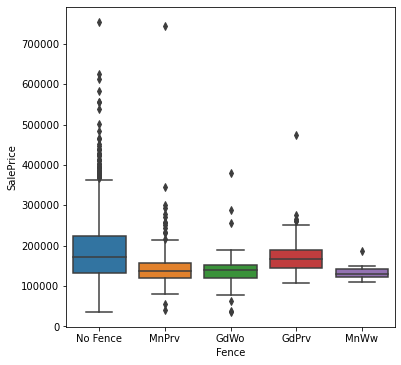

In [25]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'Fence', y = 'SalePrice', data = df)
plt.show()

In [26]:
#Imputing basement related columns
df["BsmtQual"] = df["BsmtQual"].fillna("None")
df["BsmtQual"].value_counts()/len(df)*100

TA      44.452055
Gd      42.328767
Ex       8.287671
None     2.534247
Fa       2.397260
Name: BsmtQual, dtype: float64

In [27]:
df["BsmtCond"] = df["BsmtCond"].fillna("None")
df["BsmtCond"].value_counts()/len(df)*100

TA      89.794521
Gd       4.452055
Fa       3.082192
None     2.534247
Po       0.136986
Name: BsmtCond, dtype: float64

In [28]:
df["BsmtExposure"] = df["BsmtExposure"].fillna("None")
df["BsmtExposure"].value_counts()/len(df)*100

No      65.273973
Av      15.136986
Gd       9.178082
Mn       7.808219
None     2.602740
Name: BsmtExposure, dtype: float64

In [29]:
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("None")
df["BsmtFinType1"].value_counts()/len(df)*100

Unf     29.452055
GLQ     28.630137
ALQ     15.068493
BLQ     10.136986
Rec      9.109589
LwQ      5.068493
None     2.534247
Name: BsmtFinType1, dtype: float64

In [30]:
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("None")
df["BsmtFinType2"].value_counts()/len(df)*100

Unf     86.027397
Rec      3.698630
LwQ      3.150685
None     2.602740
BLQ      2.260274
ALQ      1.301370
GLQ      0.958904
Name: BsmtFinType2, dtype: float64

In [31]:
basement_col = df[["BsmtQual","BsmtCond","BsmtExposure", "BsmtFinType1", "BsmtFinType2","BsmtFinSF1", "BsmtFinSF2",
                         "BsmtUnfSF","TotalBsmtSF"]]

In [32]:
basement_col

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  BsmtFinSF1  \
0          Gd       TA           No          GLQ          Unf         706   
1          Gd       TA           Gd          ALQ          Unf         978   
2          Gd       TA           Mn          GLQ          Unf         486   
3          TA       Gd           No          ALQ          Unf         216   
4          Gd       TA           Av          GLQ          Unf         655   
...       ...      ...          ...          ...          ...         ...   
1455       Gd       TA           No          Unf          Unf           0   
1456       Gd       TA           No          ALQ          Rec         790   
1457       TA       Gd           No          GLQ          Unf         275   
1458       TA       TA           Mn          GLQ          Rec          49   
1459       TA       TA           No          BLQ          LwQ         830   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  
0              0        150          856  
1              0        284         1262  
2              0        434          920  
3              0        540          756  
4              0        490         1145  
...          ...        ...          ...  
1455           0        953          953  
1456         163        589         1542  
1457           0        877         1152  
1458        1029          0         1078  
1459         290        136         1256  

[1460 rows x 9 columns]

<Figure size 1440x864 with 0 Axes>

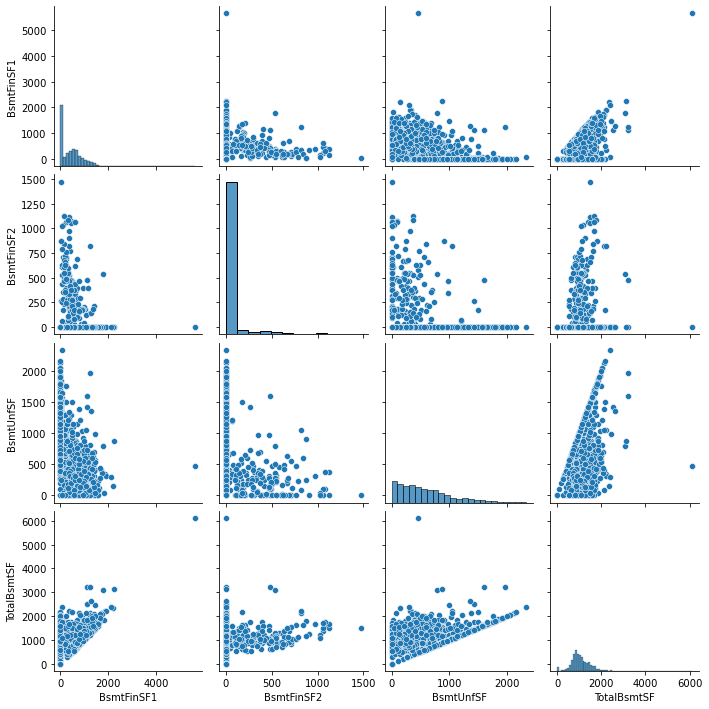

In [33]:
#plotting for basement related columns
plt.figure(figsize=(20, 12))
sns.pairplot(basement_col)
plt.show()

From the plot it can said that columns BsmtFinType2, BsmtFinType1, BsmtExposure can be dropped as they dont have much influence on sales price.

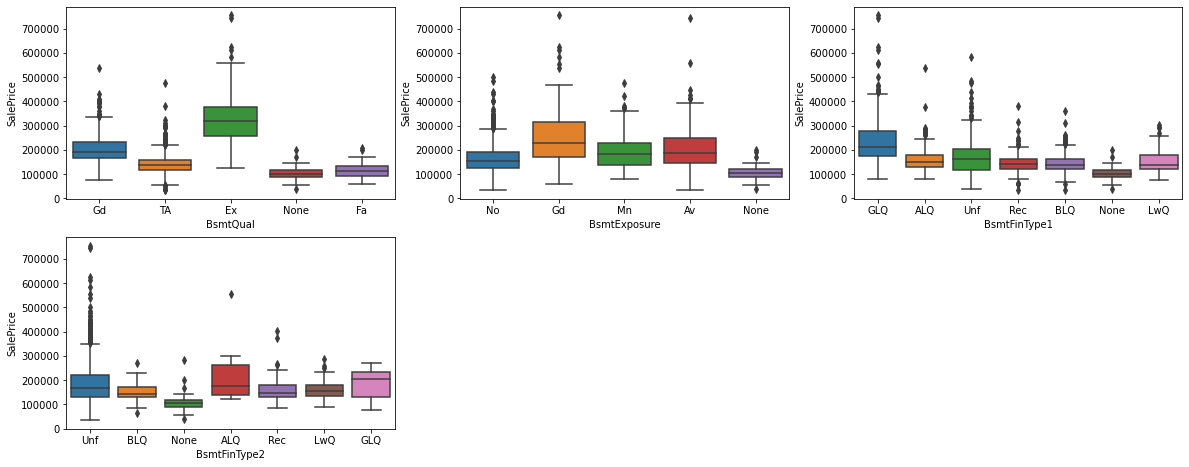

In [35]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'BsmtFinType1',y = 'SalePrice', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'BsmtFinType2',y = 'SalePrice', data = df)
plt.show()

In [36]:
df2=df.copy()

In [37]:
df2.shape

(1460, 59)

In [38]:
#dropping the basement relatd columns which may not have muc influence on target variable
df.drop(["BsmtFinSF1", "BsmtFinSF2","BsmtUnfSF","BsmtFinType2", "BsmtFinType1", "BsmtExposure" ], axis=1, inplace=True)
df.shape

(1460, 53)

In [39]:
#Imputing MasVnrArea
df["MasVnrArea"] = df["MasVnrArea"].replace(np.nan, df["MasVnrArea"].median())
df["MasVnrArea"] = df["MasVnrArea"].astype('int')
df['MasVnrArea'].value_counts()/len(df['MasVnrArea'])*100

0      59.520548
180     0.547945
72      0.547945
108     0.547945
120     0.479452
         ...    
562     0.068493
89      0.068493
921     0.068493
762     0.068493
119     0.068493
Name: MasVnrArea, Length: 327, dtype: float64

In [40]:
# checking for the remaining null values 
round(100*df.isnull().sum()[(df.isnull().sum()>0)]/len(df), 2)

MasVnrType      0.55
FireplaceQu    47.26
GarageType      5.55
GarageYrBlt     5.55
GarageQual      5.55
dtype: float64

In [41]:
#Imputing Garage related columns
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)
df['GarageYrBlt'].value_counts()/len(df['GarageYrBlt'])*100

0.0       5.547945
2005.0    4.452055
2006.0    4.041096
2004.0    3.630137
2003.0    3.424658
            ...   
1927.0    0.068493
1900.0    0.068493
1906.0    0.068493
1908.0    0.068493
1933.0    0.068493
Name: GarageYrBlt, Length: 98, dtype: float64

In [42]:
df["GarageType"] = df["GarageType"].astype('str')
df["GarageType"] = df["GarageType"].str.replace("nan", "No Garage")
df['GarageType'].value_counts()/len(df['GarageType'])*100

Attchd       59.589041
Detchd       26.506849
BuiltIn       6.027397
No Garage     5.547945
Basment       1.301370
CarPort       0.616438
2Types        0.410959
Name: GarageType, dtype: float64

In [43]:
df["GarageQual"] = df["GarageQual"].str.replace("nan", "No Garage")
df['GarageQual'].value_counts()/len(df['GarageQual'])*100

TA    89.794521
Fa     3.287671
Gd     0.958904
Ex     0.205479
Po     0.205479
Name: GarageQual, dtype: float64

## Plotting Garage related columns with the target variable

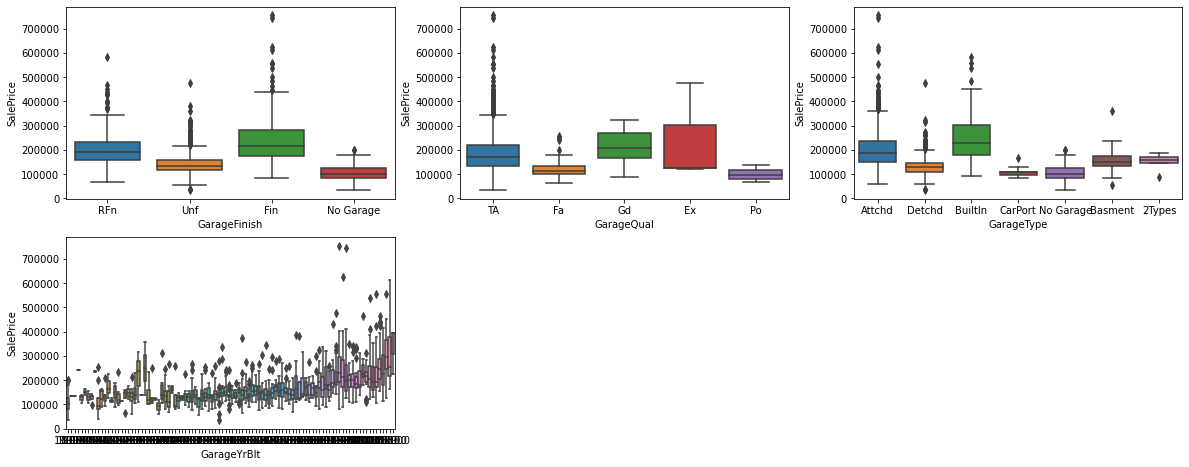

In [44]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'GarageType',y = 'SalePrice', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'GarageYrBlt',y = 'SalePrice', data = df)
plt.show()

From above its seems  GarageQual and MasVnrArea columns can be dropped since they might less influnece the target variable.

In [45]:
df.drop(['GarageQual','MasVnrArea'], axis=1, inplace=True)
df.shape

(1460, 51)

In [46]:
#Imputing FireplaceQu column
df["FireplaceQu"] = df["FireplaceQu"].fillna("No Fireplace")
df['FireplaceQu'].value_counts()/len(df['FireplaceQu'])*100

No Fireplace    47.260274
Gd              26.027397
TA              21.438356
Fa               2.260274
Ex               1.643836
Po               1.369863
Name: FireplaceQu, dtype: float64

In [47]:
#Imputing MasVnrType column
df['MasVnrType'] = df['MasVnrType'].fillna("None")
df['MasVnrType'].value_counts()/len(df['MasVnrType'])*100

None       59.726027
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64

In [48]:
# checking for the remaining null values 
round(100*df.isnull().sum()[(df.isnull().sum()>0)]/len(df), 2)

Series([], dtype: float64)

All the null values have been handled now

## Checking correlation

In [49]:
# Checking the correlation between the variables
corr = df.corr()
corr

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.356718 -0.139781     0.032628    -0.059316   
LotFrontage     -0.356718     1.000000  0.304522     0.234812    -0.053281   
LotArea         -0.139781     0.304522  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.234812  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.053281 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.116685  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.083348  0.013788     0.550684     0.073741   
TotalBsmtSF     -0.238518     0.363472  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.413773  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.072388  0.050986     0.295493     0.028942   
GrLivArea        0.074853     0.368007  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.090343  0.158155     0.111098    -0.054942   
FullBath         0.131608     0.180534  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.047222  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.236840  0.119690     0.101676     0.012980   
TotRmsAbvGrd     0.040380     0.320518  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.233221  0.271364     0.396765    -0.023820   
GarageYrBlt     -0.080997     0.099196  0.072599     0.288998    -0.006515   
GarageCars      -0.040110     0.269539  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.323511  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.075542  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.137014  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010287 -0.018340    -0.113937     0.070356   
MoSold          -0.013585     0.010451  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.006380 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.334771  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  \
MSSubClass      0.027850      0.040581    -0.238518 -0.251758  0.307886  ...   
LotFrontage     0.116685      0.083348     0.363472  0.413773  0.072388  ...   
LotArea         0.014228      0.013788     0.260833  0.299475  0.050986  ...   
OverallQual     0.572323      0.550684     0.537808  0.476224  0.295493  ...   
OverallCond    -0.375983      0.073741    -0.171098 -0.144203  0.028942  ...   
YearBuilt       1.000000      0.592855     0.391452  0.281986  0.010308  ...   
YearRemodAdd    0.592855      1.000000     0.291066  0.240379  0.140024  ...   
TotalBsmtSF     0.391452      0.291066     1.000000  0.819530 -0.174512  ...   
1stFlrSF        0.281986      0.240379     0.819530  1.000000 -0.202646  ...   
2ndFlrSF        0.010308      0.140024    -0.174512 -0.202646  1.000000  ...   
GrLivArea       0.199010      0.287389     0.454868  0.566024  0.687501  ...   
BsmtFullBath    0.187599      0.119470     0.307351  0.244671 -0.169494  ...   
FullBath        0.468271      0.439046     0.323722  0.380637  0.421378  ...   
HalfBath        0.242656      0.183331    -0.048804 -0.119916  0.609707  ...   
BedroomAbvGr   -0.070651     -0.040581     0.050450  0.127401  0.502901  ...   
TotRmsAbvGrd    0.095589      0.191740     0.285573  0.409516  0.616423  ...   
Fireplaces      0.147716      0.112581     0.339519  0.410531  0.194561  ...   
GarageYrBlt     0.272029      0.146357     0.176359  0.166642  0.064402  ...   
GarageCars      0.537850      0.420622     0.434585  0.439317  0.183926  ...   
GarageArea      0.478954      0.371600     0.486665  0.489782  0.138347  ...   
WoodDeckSF      0.224880      0.205726     0.232019  0.235459  0.092165  ...   
OpenPorchSF     0.188686      0.226298     0.247264  0.211671  0.208026  ...   
EnclosedPorch  -0.387268     -0.193919    -0.095478 -0.065292  0.061

## Plotting a heatmap to visualize the correlation

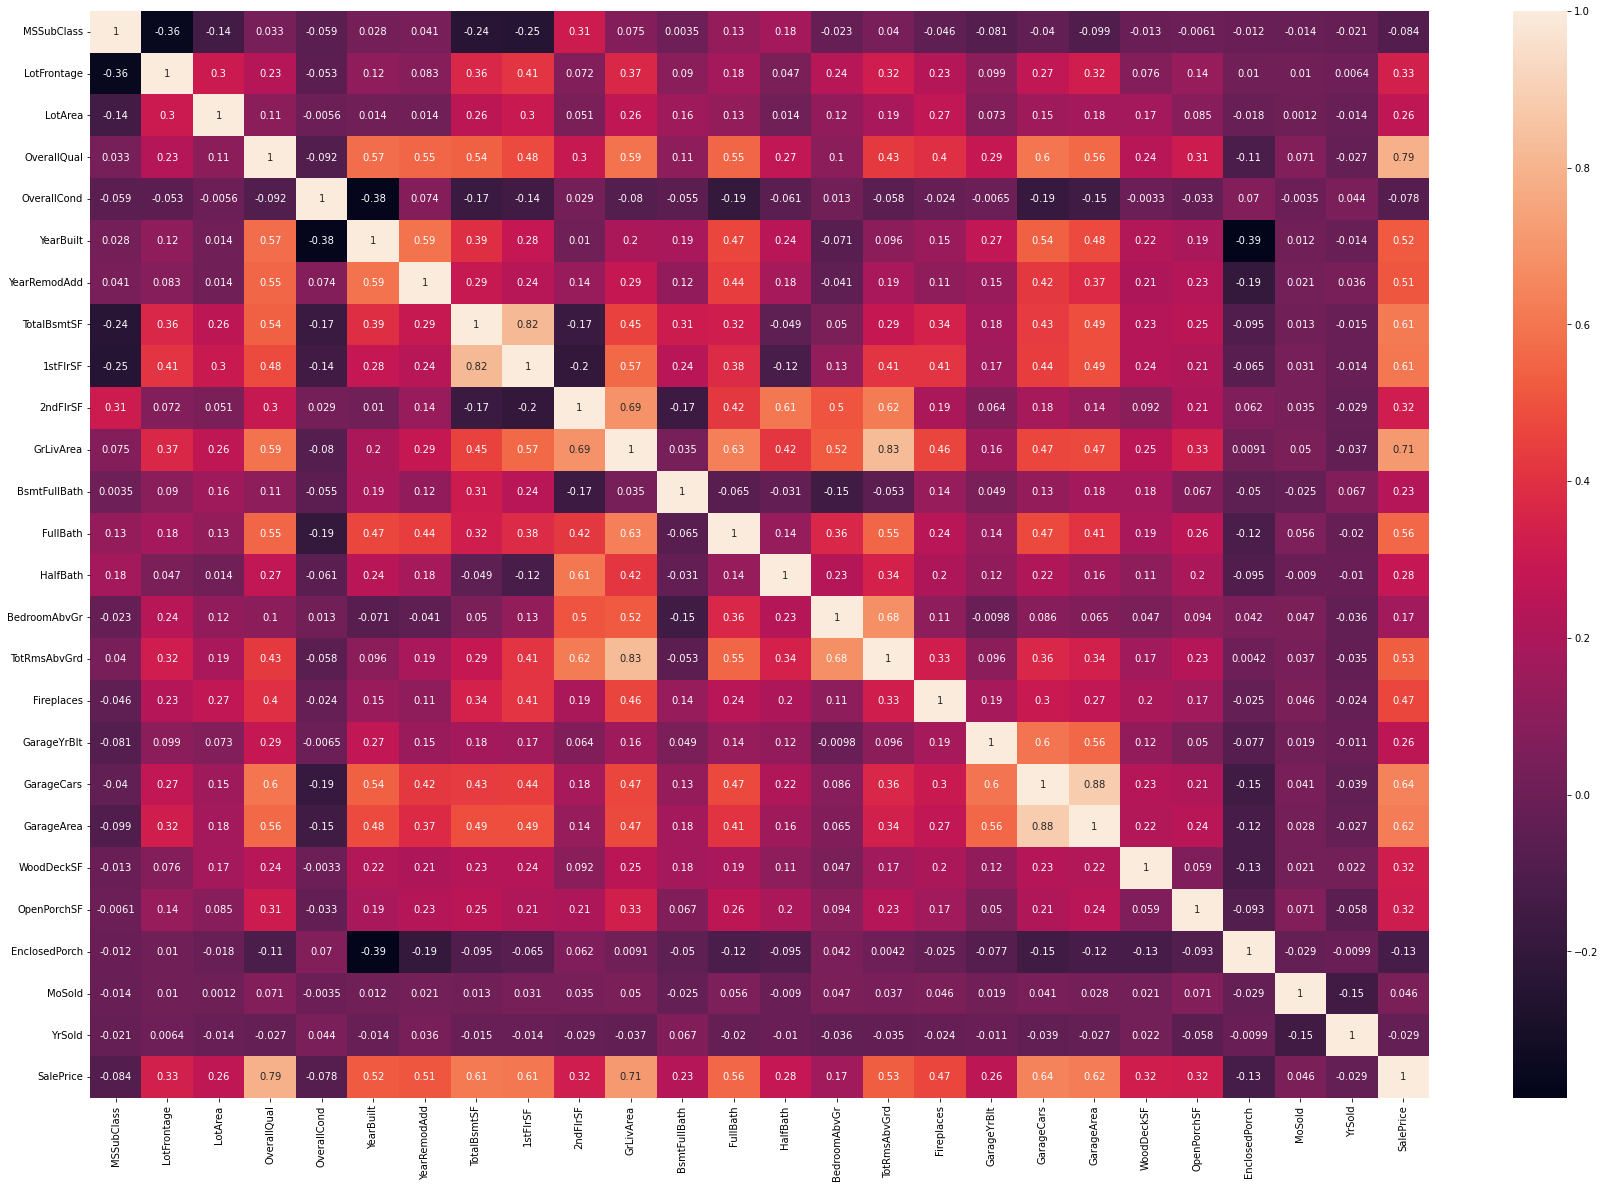

In [51]:
plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=True)
plt.show()

In [52]:
# Checking outliers
df.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99]).transpose()

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1460.0      69.863699     22.027677     21.0      60.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1460.0    1868.739726    453.697295      0.0    1958.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       90%        95%        99%       max  
MSSubClass         50.0      70.00     120.0     160.00     190.00     190.0  
LotFrontage        69.0      79.00      92.0     104.00     137.41     313.0  
LotArea          9478.5   11601.50   14381.7   17401.15   37567.64  215245.0  
OverallQual         6.0       7.00       8.0       8.00      10.00      10.0  
OverallCond         5.0       6.00       7.0       8.00       9.00       9.0  
YearBuilt        1973.0    2000.00    2006.0    2007.00    2009.00    2010.0  
YearRemodAdd     1994.0    2004.00    2006.0    2007.00    2009.00    2010.0  
TotalBsmtSF       991.5    1298.25    1602.2    1753.00    2155.05    6110.0  
1stFlrSF         1087.0    1391.25    1680.0    1831.25    2219.46    4692.0  
2ndFlrSF            0.0     728.00     954.2    1141.05    1418.92    2065.0  
GrLivArea        1464.0    1776.75    2158.3    2466.10    3123.48    5642.0  
BsmtFullBath        0.0       1.00       1.0       1.00       2.00       3.0  
FullBath            2.0       2.00       2.0       2.00       3.00       3.0  
HalfBath            0.0       1.00       1.0       1.00       1.00       2.0  
BedroomAbvGr        3.0       3.00       4.0       4.00       5.00       8.0  
TotRmsAbvGrd        6.0       7.00       9.0      10.00      11.00      14.0  
Fireplaces          1.0       1.00       1.0       2.00       2.00       3.0  
GarageYrBlt      1977.0    2001.00    2006.0    2007.00    2009.00    2010.0  
GarageCars          2.0       2.00       3.0       3.00       3.00       4.0  
GarageArea        480.0     576.00     757.1     850.10    1002.79    1418.0  
WoodDeckSF          0.0     168.00     262.0     335.00     505.46     857.0  
OpenPorchSF        25.0      68.00     130.0     175.05     285.82     547.0  
EnclosedPorch       0.0       0.00     112.0     180.15     261.05     552.0  
MoSold              6.0       8.00      10.0      11.00      12.00      12.0  
YrSold           2008.0    2009.00    2010

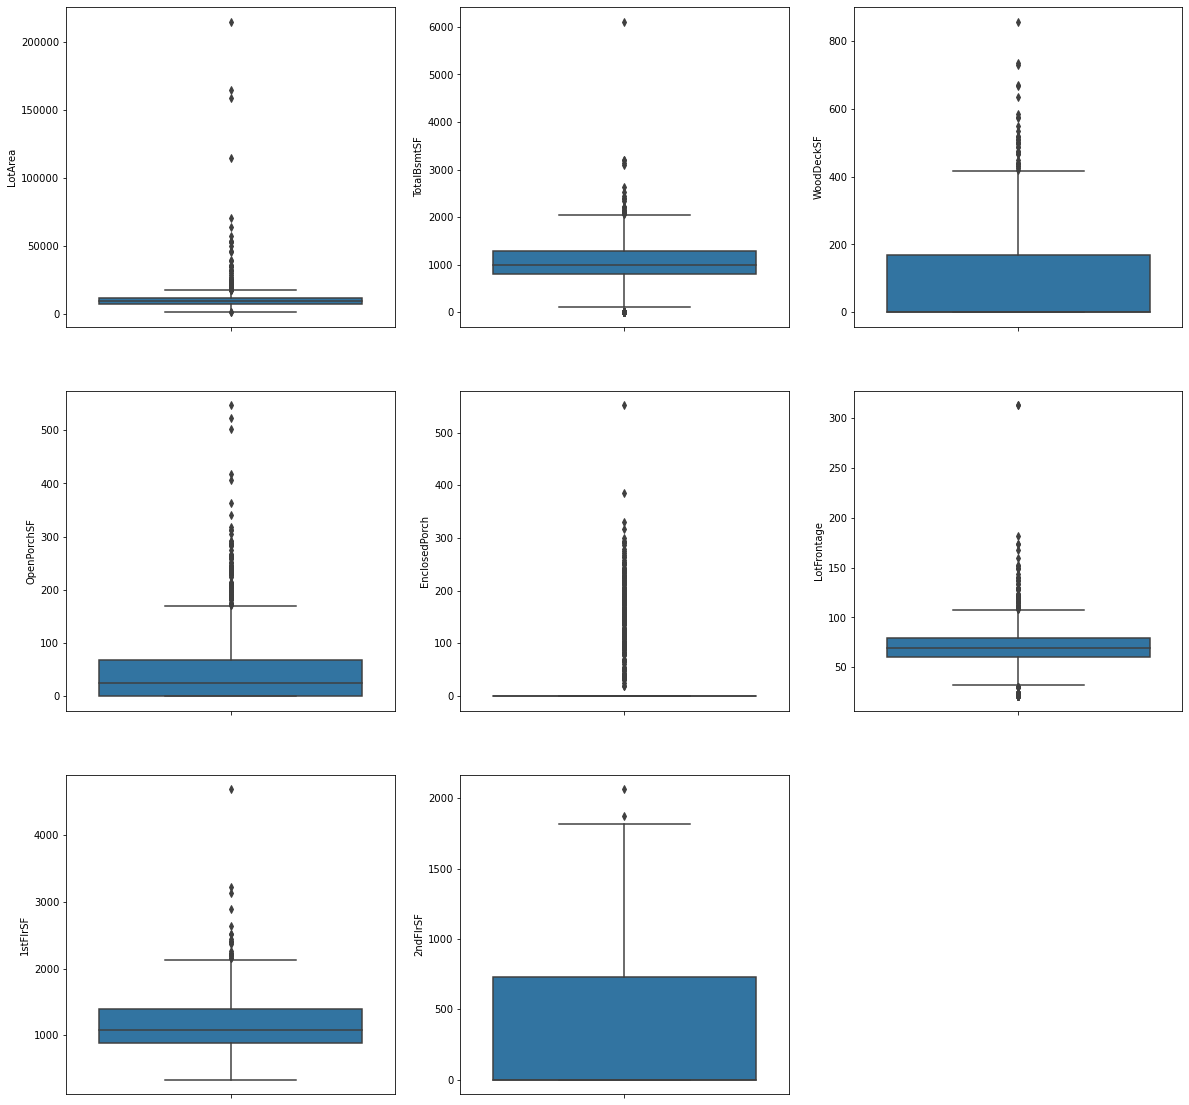

In [53]:
#plotting the outliers
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y="LotArea", data = df)
plt.subplot(3,3,2)
sns.boxplot(y="TotalBsmtSF", data = df)
plt.subplot(3,3,3)
sns.boxplot(y = 'WoodDeckSF', data = df)
plt.subplot(3,3,4)
sns.boxplot(y = 'OpenPorchSF', data = df)
plt.subplot(3,3,5)
sns.boxplot(y = 'EnclosedPorch', data = df)
plt.subplot(3,3,6)
sns.boxplot(y = 'LotFrontage', data = df)
plt.subplot(3,3,7)
sns.boxplot(y = '1stFlrSF', data = df)
plt.subplot(3,3,8)
sns.boxplot(y = '2ndFlrSF', data = df)
plt.show()

In [54]:
#Handling Outliers

# Removing values beyond 99% for LotArea
df = df[df["LotArea"] < df['LotArea'].quantile(0.99)]

# Removing values beyond 99% for TotalBsmtSF
df = df[df["TotalBsmtSF"] < df['TotalBsmtSF'].quantile(0.99)]

# Removing values beyond 99% for WoodDeckSF
df = df[df["WoodDeckSF"] < df['WoodDeckSF'].quantile(0.99)]

# Removing values beyond 99% for OpenPorchSF
df = df[df["OpenPorchSF"] < df['OpenPorchSF'].quantile(0.99)]

# Removing values beyond 99% for OpenPorchSF
df = df[df["EnclosedPorch"] < df['EnclosedPorch'].quantile(0.99)]

In [55]:
# Determine the percentage of data retained after removing the outliers
data = round(100*(len(df)/1460),2)
print(data)

94.93


## Visulaizing the target variable

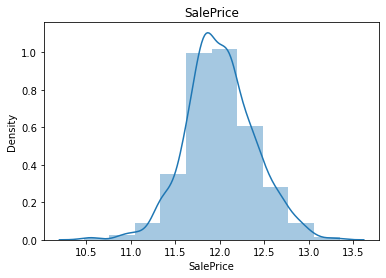

In [56]:
# transform the sales price
df['SalePrice'] = np.log1p(df['SalePrice'])

plt.title('SalePrice')
sns.distplot(df['SalePrice'], bins=10)
plt.show()

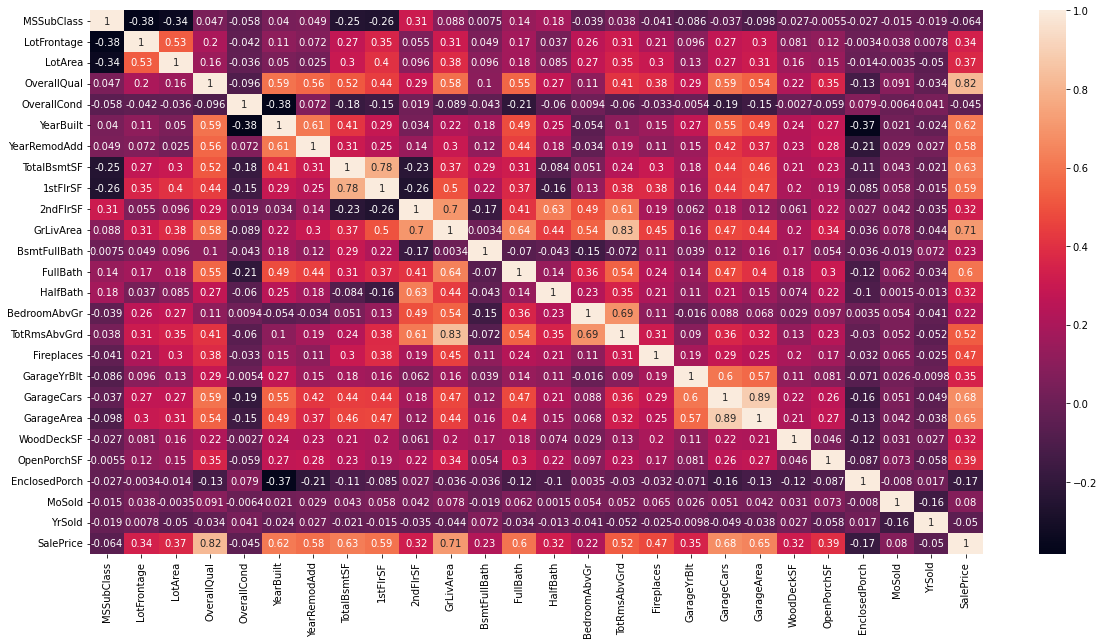

In [57]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

TotRmsAbvGrd & GrLivArea and Garage Area & Garage Cars shows high correlation

In [58]:
# Removing the highly correlated variables
df.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)
df.shape

(1386, 49)

In [59]:
#newly derived columns
df[["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
4       2000          2000       2000.0    2008
5       1993          1995       1993.0    2009

In [60]:
# Create a new column named IsRemodelled to determine whether the house has been remodelled or not
def checkRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
df['IsRemodelled'] = df.apply(checkRemodel, axis=1)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
4          60       RL         84.0    14260      IR1         Lvl       FR2   
5          50       RL         85.0    14115      IR1         Lvl    Inside   

  Neighborhood Condition1 BldgType  ... WoodDeckSF  OpenPorchSF  \
0      CollgCr       Norm     1Fam  ...          0           61   
1      Veenker      Feedr     1Fam  ...        298            0   
2      CollgCr       Norm     1Fam  ...          0           42   
4      NoRidge       Norm     1Fam  ...        192           84   
5      Mitchel       Norm     1Fam  ...         40           30   

   EnclosedPorch     Fence  MoSold YrSold SaleType SaleCondition  SalePrice  \
0              0  No Fence       2   2008       WD        Normal  12.247699   
1              0  No Fence       5   2007       WD        Normal  12.109016   
2              0  No Fence       9   2008       WD        Normal  12.317171   
4              0  No Fence      12   2008       WD        Normal  12.429220   
5              0     MnPrv      10   2009       WD        Normal  11.870607   

  IsRemodelled  
0            0  
1            0  
2            1  
4            0  
5            1  

[5 rows x 50 columns]

In [61]:
# Create a new column named BuiltOrRemodelledAge to determine the age of the building at the time of selling

def funBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df['BuiltOrRemodelAge'] = df.apply(funBuiltOrRemodelAge, axis=1)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
4          60       RL         84.0    14260      IR1         Lvl       FR2   
5          50       RL         85.0    14115      IR1         Lvl    Inside   

  Neighborhood Condition1 BldgType  ... OpenPorchSF  EnclosedPorch     Fence  \
0      CollgCr       Norm     1Fam  ...          61              0  No Fence   
1      Veenker      Feedr     1Fam  ...           0              0  No Fence   
2      CollgCr       Norm     1Fam  ...          42              0  No Fence   
4      NoRidge       Norm     1Fam  ...          84              0  No Fence   
5      Mitchel       Norm     1Fam  ...          30              0     MnPrv   

   MoSold  YrSold SaleType SaleCondition  SalePrice IsRemodelled  \
0       2    2008       WD        Normal  12.247699            0   
1       5    2007       WD        Normal  12.109016            0   
2       9    2008       WD        Normal  12.317171            1   
4      12    2008       WD        Normal  12.429220            0   
5      10    2009       WD        Normal  11.870607            1   

  BuiltOrRemodelAge  
0                 5  
1                31  
2                 6  
4                 8  
5                14  

[5 rows x 51 columns]

In [62]:
#Create a new column which would indicate if the Garage is old or new.

def GarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
df['OldOrNewGarage'] = df['GarageYrBlt'].apply(GarageConstructionPeriod)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
4          60       RL         84.0    14260      IR1         Lvl       FR2   
5          50       RL         85.0    14115      IR1         Lvl    Inside   

  Neighborhood Condition1 BldgType  ... EnclosedPorch     Fence  MoSold  \
0      CollgCr       Norm     1Fam  ...             0  No Fence       2   
1      Veenker      Feedr     1Fam  ...             0  No Fence       5   
2      CollgCr       Norm     1Fam  ...             0  No Fence       9   
4      NoRidge       Norm     1Fam  ...             0  No Fence      12   
5      Mitchel       Norm     1Fam  ...             0     MnPrv      10   

   YrSold  SaleType SaleCondition  SalePrice IsRemodelled BuiltOrRemodelAge  \
0    2008        WD        Normal  12.247699            0                 5   
1    2007        WD        Normal  12.109016            0                31   
2    2008        WD        Normal  12.317171            1                 6   
4    2008        WD        Normal  12.429220            0                 8   
5    2009        WD        Normal  11.870607            1                14   

  OldOrNewGarage  
0              1  
1              0  
2              1  
4              1  
5              0  

[5 rows x 52 columns]

In [63]:
#dropping the original columns
df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)
df.shape

(1386, 48)

In [64]:
df[['ExterQual','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageFinish','ExterCond','LotShape','Neighborhood']].head()

ExterQual BsmtQual BsmtCond HeatingQC KitchenQual GarageFinish ExterCond  \
0        Gd       Gd       TA        Ex          Gd          RFn        TA   
1        TA       Gd       TA        Ex          TA          RFn        TA   
2        Gd       Gd       TA        Ex          Gd          RFn        TA   
4        Gd       Gd       TA        Ex          Gd          RFn        TA   
5        TA       Gd       TA        Ex          TA          Unf        TA   

  LotShape Neighborhood  
0      Reg      CollgCr  
1      Reg      Veenker  
2      IR1      CollgCr  
4      IR1      NoRidge  
5      IR1      Mitchel

In [65]:
#Labeling the columns
df['ExterQual'] = df['ExterQual'].astype('category')
df['BsmtQual'] = df['BsmtQual'].astype('category')
df['BsmtCond'] = df['BsmtCond'].astype('category')
df['HeatingQC'] = df['HeatingQC'].astype('category')
df['KitchenQual'] = df['KitchenQual'].astype('category')
df['GarageFinish'] = df['GarageFinish'].astype('category')
df['ExterCond'] = df['ExterCond'].astype('category')
df['LotShape'] = df['LotShape'].astype('category')
df['Neighborhood'] = df['Neighborhood'].astype('category')

In [66]:
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Fireplace': 0})
df['GarageFinish'] = df.GarageFinish.map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
df['Fence'] = df['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'No Fence': 0 })

In [67]:
#columns change to numerical
df[['ExterQual','BsmtQual','BsmtCond','HeatingQC',  'KitchenQual','GarageFinish','ExterCond','LotShape']].head()

ExterQual BsmtQual BsmtCond HeatingQC KitchenQual GarageFinish ExterCond  \
0         3        4        3         4           3            2         2   
1         2        4        3         4           2            2         2   
2         3        4        3         4           3            2         2   
4         3        4        3         4           3            2         2   
5         2        4        3         4           2            1         2   

  LotShape  
0        3  
1        3  
2        0  
4        0  
5        0

In [68]:
# categorical columns
df[['MSZoning','LandContour','LotConfig','Condition1','BldgType','HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation','Neighborhood','GarageType','SaleType','SaleCondition']].head()

MSZoning LandContour LotConfig Condition1 BldgType HouseStyle RoofStyle  \
0       RL         Lvl    Inside       Norm     1Fam     2Story     Gable   
1       RL         Lvl       FR2      Feedr     1Fam     1Story     Gable   
2       RL         Lvl    Inside       Norm     1Fam     2Story     Gable   
4       RL         Lvl       FR2       Norm     1Fam     2Story     Gable   
5       RL         Lvl    Inside       Norm     1Fam     1.5Fin     Gable   

  Exterior1st Exterior2nd MasVnrType Foundation Neighborhood GarageType  \
0     VinylSd     VinylSd    BrkFace      PConc      CollgCr     Attchd   
1     MetalSd     MetalSd       None     CBlock      Veenker     Attchd   
2     VinylSd     VinylSd    BrkFace      PConc      CollgCr     Attchd   
4     VinylSd     VinylSd    BrkFace      PConc      NoRidge     Attchd   
5     VinylSd     VinylSd       None       Wood      Mitchel     Attchd   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
4       WD        Normal  
5       WD        Normal

In [69]:
df_dummy = pd.get_dummies(df[['MSZoning','LandContour','LotConfig','Condition1','BldgType','HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation','GarageType','SaleType','SaleCondition','Neighborhood']],drop_first=True)
df_new = pd.concat([df, df_dummy], axis='columns')
df_new.shape

(1386, 163)

In [70]:
# dropping the actual variables
df_new = df_new.drop(['MSZoning','LandContour','LotConfig','Condition1','BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','Foundation','GarageType','SaleType','SaleCondition','Neighborhood'], axis="columns")
df_new.shape

(1386, 148)

In [71]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1458
Columns: 148 entries, MSSubClass to Neighborhood_Veenker
dtypes: category(8), float64(2), int64(23), uint8(115)
memory usage: 449.6 KB


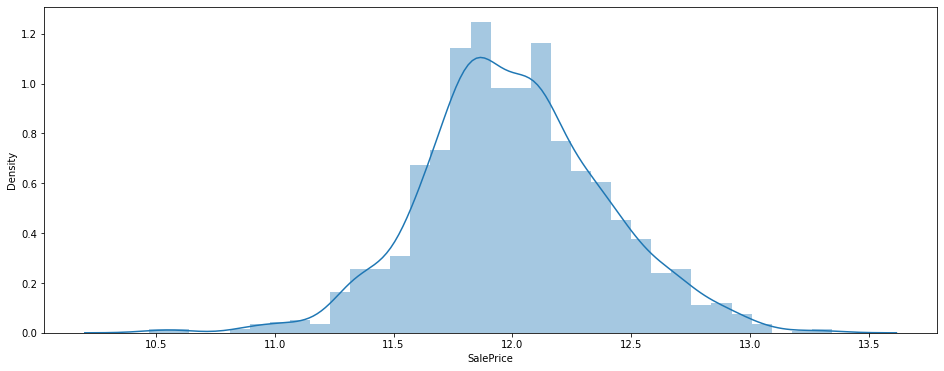

In [72]:
#plotting the distribution plot of sales price of the new dataset
plt.figure(figsize=(16,6))
sns.distplot(df_new.SalePrice)
plt.show()

## Splitting the dataset into train and test data

In [73]:
df_train, df_test = train_test_split(df_new, train_size=0.7,test_size = 0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(970, 148)
(416, 148)


## Scaling the train and test data set

In [74]:
num_col =['MSSubClass','LotArea','OverallQual','OverallCond',           
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','GarageCars',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

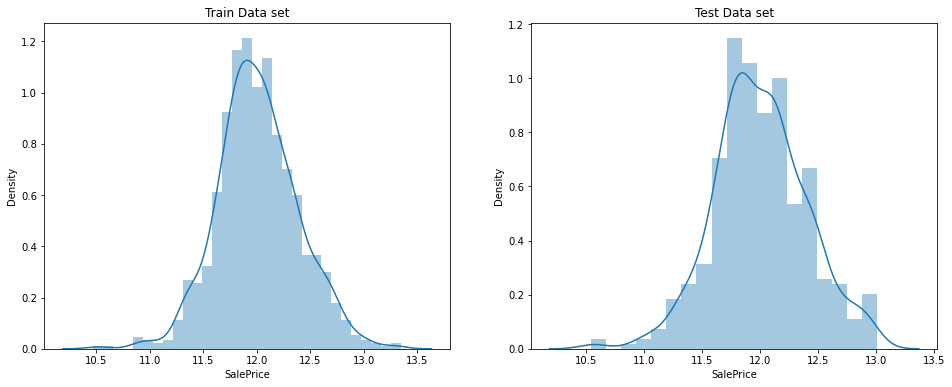

In [75]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title("Train Data set")
sns.distplot(df_train.SalePrice)
plt.subplot(122)
plt.title("Test Data set")
sns.distplot(df_test.SalePrice)
plt.show()

## Finding the independent and dependent variables

In [76]:
X_train = df_train
y_train = df_train.pop('SalePrice')

X_test = df_test
y_test = df_test.pop('SalePrice')

## Linear Regression using RFE

In [77]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [78]:
y_LR_Pred = lm.predict(X_train)
print(r2_score(y_train, y_LR_Pred))
RSS = np.sum(np.square(y_train-y_LR_Pred))
print(RSS)
MSE = mean_squared_error(y_train, y_LR_Pred)
print(MSE)
#RMSE
print(MSE*0.5)

0.9342888611507667
9.13306814755847
0.009415534172740691
0.004707767086370346


In [79]:
y_LR_Pred = lm.predict(X_train)
res = y_train-y_LR_Pred
res

952    -0.037404
1178    0.107032
565    -0.025834
1039   -0.030250
516    -0.118082
          ...   
845     0.030668
55      0.120245
367     0.103474
83      0.008395
835    -0.040605
Name: SalePrice, Length: 970, dtype: float64

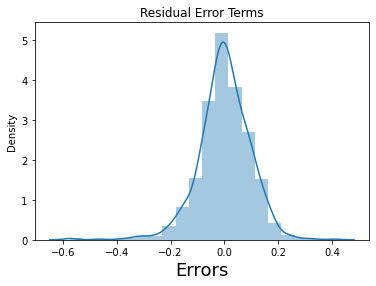

In [80]:
#Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
plt.title('Residual Error Terms') 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

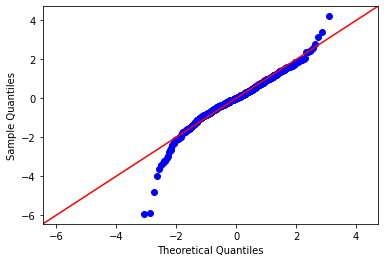

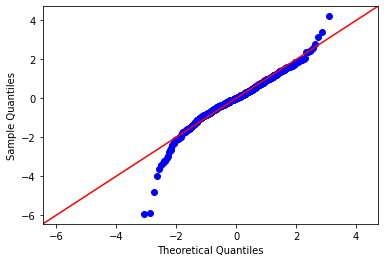

In [81]:
sm.qqplot(res, fit=True,line='45')

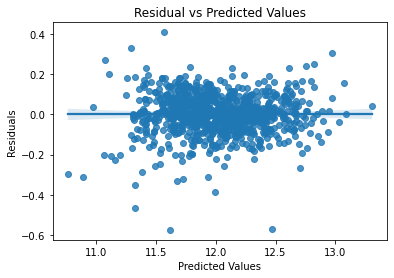

In [82]:
sns.regplot(x=y_LR_Pred, y=res)
plt.title('Residual vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [83]:
#Columns selected by RFE
col = X_train.columns[rfe.support_]
rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
rfe_df = rfe_df.loc[rfe_df['rfe_support'] == True]
rfe_df.reset_index(drop=True, inplace=True)
rfe_df

Variable  rfe_support  rfe_ranking
0             OverallQual         True            1
1             OverallCond         True            1
2             TotalBsmtSF         True            1
3               GrLivArea         True            1
4              GarageCars         True            1
5             MSZoning_FV         True            1
6             MSZoning_RH         True            1
7             MSZoning_RL         True            1
8             MSZoning_RM         True            1
9           LotConfig_FR3         True            1
10        Condition1_Norm         True            1
11        Condition1_RRAn         True            1
12        Condition1_RRNn         True            1
13        BldgType_Duplex         True            1
14         BldgType_Twnhs         True            1
15      HouseStyle_2.5Unf         True            1
16        RoofStyle_Gable         True            1
17      RoofStyle_Gambrel         True            1
18          RoofStyle_Hip         True            1
19      RoofStyle_Mansard         True            1
20    Exterior1st_BrkComm         True            1
21     Exterior1st_CBlock         True            1
22    Exterior1st_CemntBd         True            1
23    Exterior1st_Wd Sdng         True            1
24    Exterior2nd_AsphShn         True            1
25     Exterior2nd_CBlock         True            1
26    Exterior2nd_CmentBd         True            1
27    Exterior2nd_Wd Sdng         True            1
28       Foundation_PConc         True            1
29        Foundation_Wood         True            1
30      GarageType_Attchd         True            1
31     GarageType_Basment         True            1
32     GarageType_BuiltIn         True            1
33     GarageType_CarPort         True            1
34      GarageType_Detchd         True            1
35   GarageType_No Garage         True            1
36           SaleType_CWD         True            1
37           SaleType_Con         True            1
38         SaleType_ConLD         True            1
39           SaleType_New         True            1
40           SaleType_Oth         True            1
41  SaleCondition_AdjLand         True            1
42   SaleCondition_Normal         True            1
43   Neighborhood_Crawfor         True            1
44   Neighborhood_Edwards         True            1
45   Neighborhood_MeadowV         True            1
46   Neighborhood_NridgHt         True            1
47   Neighborhood_OldTown         True            1
48     Neighborhood_SWISU         True            1
49   Neighborhood_Veenker         True            1

In [84]:
# Assign the 50 columns to X_train_rfe
X_train_rfe = X_train[col]

In [85]:
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Model Building and Evaluation by Ridge Regression

In [86]:
# list of alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
# the best hyperparameter
print(ridge_model_cv.best_params_)

{'alpha': 0.3}


In [88]:
#fit the data to ridge
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.09430642  0.05692272  0.073664    0.13027072  0.05277435  0.33742715
  0.22161139  0.28195563  0.17464814 -0.0352438   0.06000416  0.05865377
  0.06528935 -0.0681696  -0.07049207 -0.12856007 -0.16306625 -0.15334486
 -0.15427365 -0.13755617 -0.3223622  -0.04415174 -0.06056452 -0.0978987
  0.05234149 -0.04415174  0.08912085  0.05465678  0.08413001 -0.12195332
  0.09226894  0.07296631  0.11937362  0.08191336  0.05021806  0.03031572
  0.10005516  0.07789246  0.0374455   0.08892261  0.10739554  0.0720672
  0.05952061  0.07979984 -0.05066806 -0.05969255  0.07983309 -0.09658206
 -0.09196819  0.09371023]


In [89]:
# display the mean scores
ridge_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=500]
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
5          0.3         -0.086735        -0.093850                1
6          0.4         -0.086845        -0.093852                2
12         1.0         -0.087402        -0.093855                3
11         0.9         -0.087328        -0.093857                4
7          0.5         -0.086961        -0.093859                5
10         0.8         -0.087247        -0.093862                6
8          0.6         -0.087064        -0.093863                7
9          0.7         -0.087160        -0.093863                8
13         2.0         -0.087932        -0.093864                9
14         3.0         -0.088297        -0.093867               10
15         4.0         -0.088586        -0.093871               11
16         5.0         -0.088823        -0.093896               12
4          0.2         -0.086619        -0.093937               13
17         6.0         -0.089039        -0.093939               14
18         7.0         -0.089234        -0.093971               15
19         8.0         -0.089414        -0.094004               16
20         9.0         -0.089582        -0.094051               17
21        10.0         -0.089742        -0.094094               18
3          0.1         -0.086494        -0.094111               19
2         0.01         -0.086404        -0.094373               20
1        0.001         -0.086396        -0.094407               21
0       0.0001         -0.086395        -0.094411               22
22          20         -0.091058        -0.094532               23
23          50         -0.093459        -0.095903               24
24         100         -0.095798        -0.097515               25
25         500         -0.112436        -0.113256               26

In [90]:
#printing R2 , RSS, MSE for test train sets
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric2.append(mse_test_lr)

r2_train:
0.9076867339657406
r2_test:
0.8719234019700453
RSS_train:
12.830447993741059
RSS_test:
8.466581661481179
MSE_train:
0.013227265972928927
MSE_test:
0.020352359763175912


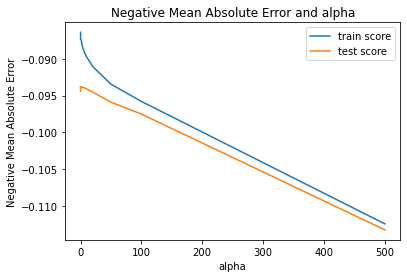

In [91]:
# plotting mean test and train scoes with alpha 

ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [92]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.head()

Features  Coefficient
0  OverallQual       0.0943
1  OverallCond       0.0569
2  TotalBsmtSF       0.0737
3    GrLivArea       0.1303
4   GarageCars       0.0528

In [93]:
#selecting top 10 parameters from ridge
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure       Coef
0             OverallQual  11.695170
6             MSZoning_RH   0.337427
8             MSZoning_RM   0.281956
7             MSZoning_RL   0.221611
9           LotConfig_FR3   0.174648
4              GarageCars   0.130271
33     GarageType_CarPort   0.119374
41  SaleCondition_AdjLand   0.107396
37           SaleType_Con   0.100055
1             OverallCond   0.094306

## Model Building and Evaluation by Lasso Regression

In [94]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8972359682145876
0.8684907175674821


In [95]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [96]:
# the best hyperparameter
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [97]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)
lasso.coef_

array([ 0.09643316,  0.05696614,  0.07382277,  0.12946648,  0.05228898,
        0.31649957,  0.18835941,  0.25949885,  0.15004079, -0.        ,
        0.05699131,  0.0498462 ,  0.03355811, -0.0655663 , -0.06901907,
       -0.11781998, -0.11630972, -0.08614244, -0.10750292, -0.07541215,
       -0.30316492, -0.00254439, -0.        , -0.09097975,  0.        ,
       -0.00142674,  0.02422797,  0.04773789,  0.08369594, -0.05103893,
        0.04369813,  0.01119701,  0.07085337,  0.01303138,  0.        ,
       -0.01721489,  0.07277255,  0.00170488,  0.01382214,  0.08308709,
        0.07864376,  0.02455422,  0.05448439,  0.07796674, -0.04566649,
       -0.0463945 ,  0.07670945, -0.0958051 , -0.0853992 ,  0.08025864])

In [98]:
#printing R2, RSS, MSE values for test and train sets in Lasso
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric3.append(mse_test_lr)

r2_train:
0.9065929539352917
r2_test:
0.8720572852101992
RSS_train:
12.98247043212017
RSS_test:
8.457731228199048
MSE_train:
0.01338399013620636
MSE_test:
0.02033108468317079


In [99]:
cv_result_lsso = pd.DataFrame(lasso_model_cv.cv_results_)
cv_result_lsso['param_alpha'] = cv_result_lsso['param_alpha'].astype('float32')
cv_result_lsso.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.018588      0.005949         0.002998    8.928718e-04       0.0001   
1       0.006196      0.001324         0.002798    9.804843e-04       0.0010   
2       0.004797      0.000749         0.003200    4.016441e-04       0.0100   
3       0.004797      0.001326         0.002598    7.993461e-04       0.1000   
4       0.004198      0.000400         0.001998    4.156970e-07       0.2000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.093025          -0.091489          -0.089126   
1   {'alpha': 0.001}          -0.090966          -0.094524          -0.093765   
2    {'alpha': 0.01}          -0.104330          -0.101206          -0.107592   
3     {'alpha': 0.1}          -0.149410          -0.166984          -0.156827   
4     {'alpha': 0.2}          -0.213879          -0.254138          -0.231422   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.102826  ...        -0.093941        0.004679                1   
1          -0.102344  ...        -0.095406        0.003777                2   
2          -0.106914  ...        -0.104452        0.002508                3   
3          -0.151586  ...        -0.153086        0.008698                4   
4          -0.227088  ...        -0.224774        0.018884                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.087096           -0.088498           -0.088702   
1           -0.092403           -0.091761           -0.091801   
2           -0.103445           -0.104988           -0.102886   
3           -0.151508           -0.152816           -0.153597   
4           -0.221918           -0.223608           -0.226728   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.084932           -0.087283         -0.087302         0.001346  
1           -0.088330           -0.091388         -0.091137         0.001440  
2           -0.101921           -0.104434         -0.103535         0.001091  
3           -0.153485           -0.150536         -0.152388         0.001187  
4           -0.224523           -0.223657         -0.224087         0.001567  

[5 rows x 21 columns]

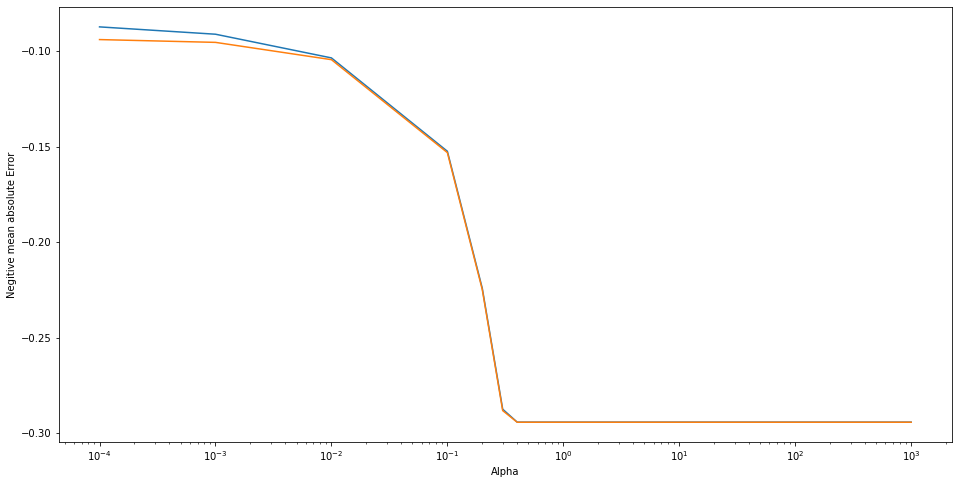

In [100]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_train_score'])
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negitive mean absolute Error')
plt.xlabel('Alpha')
plt.show()

In [101]:
#checking for the alpha 0.0001
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9065929539352917
0.8720572852101992


In [102]:
#getting features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere       Coef
0        MSSubClass  11.727891
6         ExterQual   0.316500
8          BsmtQual   0.259499
7         ExterCond   0.188359
9          BsmtCond   0.150041
4       OverallQual   0.129466
1       LotFrontage   0.096433
29     IsRemodelled   0.083696
40    LotConfig_FR2   0.083087
50  Condition1_RRNn   0.080259

In [103]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0             OverallQual       0.0964
1             OverallCond       0.0570
2             TotalBsmtSF       0.0738
3               GrLivArea       0.1295
4              GarageCars       0.0523
5             MSZoning_FV       0.3165
6             MSZoning_RH       0.1884
7             MSZoning_RL       0.2595
8             MSZoning_RM       0.1500
9         Condition1_Norm       0.0570
10        Condition1_RRAn       0.0498
11        Condition1_RRNn       0.0336
12        BldgType_Duplex      -0.0656
13         BldgType_Twnhs      -0.0690
14      HouseStyle_2.5Unf      -0.1178
15        RoofStyle_Gable      -0.1163
16      RoofStyle_Gambrel      -0.0861
17          RoofStyle_Hip      -0.1075
18      RoofStyle_Mansard      -0.0754
19    Exterior1st_BrkComm      -0.3032
20     Exterior1st_CBlock      -0.0025
21    Exterior1st_Wd Sdng      -0.0910
22     Exterior2nd_CBlock      -0.0014
23    Exterior2nd_CmentBd       0.0242
24    Exterior2nd_Wd Sdng       0.0477
25       Foundation_PConc       0.0837
26        Foundation_Wood      -0.0510
27      GarageType_Attchd       0.0437
28     GarageType_Basment       0.0112
29     GarageType_BuiltIn       0.0709
30     GarageType_CarPort       0.0130
31   GarageType_No Garage      -0.0172
32           SaleType_CWD       0.0728
33           SaleType_Con       0.0017
34         SaleType_ConLD       0.0138
35           SaleType_New       0.0831
36           SaleType_Oth       0.0786
37  SaleCondition_AdjLand       0.0246
38   SaleCondition_Normal       0.0545
39   Neighborhood_Crawfor       0.0780
40   Neighborhood_Edwards      -0.0457
41   Neighborhood_MeadowV      -0.0464
42   Neighborhood_NridgHt       0.0767
43   Neighborhood_OldTown      -0.0958
44     Neighborhood_SWISU      -0.0854
45   Neighborhood_Veenker       0.0803

In [104]:
X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [105]:
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to dataframe

tempLS_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
tempLS_df = tempLS_df.loc[tempLS_df['rfe_support'] == True]
tempLS_df.reset_index(drop=True, inplace=True)

tempLS_df['Coefficient'] = tempLS_df['Features'].apply(find)
tempLS_df = tempLS_df.sort_values(by=['Coefficient'], ascending=False)
tempLS_df = tempLS_df.head(10)
tempLS_df

Features  rfe_support  rfe_ranking  Coefficient
2            MSZoning_FV         True            1     0.316500
4            MSZoning_RL         True            1     0.259499
3            MSZoning_RH         True            1     0.188359
5            MSZoning_RM         True            1     0.150041
1              GrLivArea         True            1     0.129466
0            OverallQual         True            1     0.096433
14  Neighborhood_Veenker         True            1     0.080259
12       Foundation_Wood         True            1    -0.051039
10     RoofStyle_Mansard         True            1    -0.075412
13    Neighborhood_SWISU         True            1    -0.085399

In [106]:
#comparing the results of both Ridge and lasso

resultTable = {'Metric':["R2 Score Train", "R2Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test"],
              'Ridge regression':metric2}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric3, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

Metric  Ridge regression  Lasso regression
0  R2 Score Train          0.907687          0.906593
1    R2Score Test          0.871923          0.872057
2       RSS Train         12.830448         12.982470
3        RSS Test          8.466582          8.457731
4       MSE Train          0.013227          0.013384
5        MSE Test          0.020352          0.020331

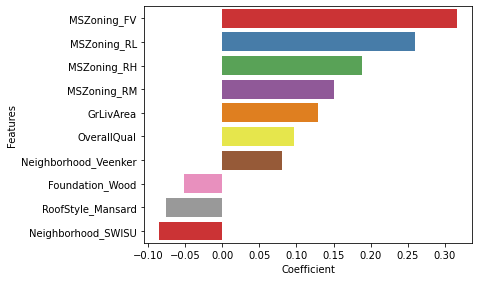

In [107]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = tempLS_df)
plt.show()

## Questions and Answer section

Question 1

In [108]:
# Ridge regression
ridge = Ridge(alpha=0.6)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.09558315  0.05731297  0.073773    0.12989104  0.05210317  0.29405567
  0.17459132  0.24076423  0.13277127 -0.02750164  0.05893541  0.05630635
  0.05782068 -0.06598516 -0.06921426 -0.12772941 -0.13240381 -0.11537229
 -0.12400655 -0.10169472 -0.27170759 -0.03917203 -0.04012147 -0.09587046
  0.03788675 -0.03917203  0.06776992  0.05283665  0.08457776 -0.09763785
  0.07286999  0.049128    0.09968405  0.06080248  0.02993561  0.00963172
  0.09122034  0.06407249  0.02445897  0.08904216  0.0985813   0.06333103
  0.05973867  0.07897089 -0.04996017 -0.05653516  0.07819265 -0.09594396
 -0.08891126  0.08843709]


In [109]:
#printing the values of R2, RSS, MSE for train and test

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric4=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric4.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric4.append(mse_test_lr)

r2_train:
0.9070984840625551
r2_test:
0.8718173608271884
RSS_train:
12.912207746313825
RSS_test:
8.473591575933035
MSE_train:
0.01331155437764312
MSE_test:
0.020369210519069796


In [110]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0             OverallQual       0.0956
1             OverallCond       0.0573
2             TotalBsmtSF       0.0738
3               GrLivArea       0.1299
4              GarageCars       0.0521
5             MSZoning_FV       0.2941
6             MSZoning_RH       0.1746
7             MSZoning_RL       0.2408
8             MSZoning_RM       0.1328
9           LotConfig_FR3      -0.0275
10        Condition1_Norm       0.0589
11        Condition1_RRAn       0.0563
12        Condition1_RRNn       0.0578
13        BldgType_Duplex      -0.0660
14         BldgType_Twnhs      -0.0692
15      HouseStyle_2.5Unf      -0.1277
16        RoofStyle_Gable      -0.1324
17      RoofStyle_Gambrel      -0.1154
18          RoofStyle_Hip      -0.1240
19      RoofStyle_Mansard      -0.1017
20    Exterior1st_BrkComm      -0.2717
21     Exterior1st_CBlock      -0.0392
22    Exterior1st_CemntBd      -0.0401
23    Exterior1st_Wd Sdng      -0.0959
24    Exterior2nd_AsphShn       0.0379
25     Exterior2nd_CBlock      -0.0392
26    Exterior2nd_CmentBd       0.0678
27    Exterior2nd_Wd Sdng       0.0528
28       Foundation_PConc       0.0846
29        Foundation_Wood      -0.0976
30      GarageType_Attchd       0.0729
31     GarageType_Basment       0.0491
32     GarageType_BuiltIn       0.0997
33     GarageType_CarPort       0.0608
34      GarageType_Detchd       0.0299
35   GarageType_No Garage       0.0096
36           SaleType_CWD       0.0912
37           SaleType_Con       0.0641
38         SaleType_ConLD       0.0245
39           SaleType_New       0.0890
40           SaleType_Oth       0.0986
41  SaleCondition_AdjLand       0.0633
42   SaleCondition_Normal       0.0597
43   Neighborhood_Crawfor       0.0790
44   Neighborhood_Edwards      -0.0500
45   Neighborhood_MeadowV      -0.0565
46   Neighborhood_NridgHt       0.0782
47   Neighborhood_OldTown      -0.0959
48     Neighborhood_SWISU      -0.0889
49   Neighborhood_Veenker       0.0884

In [111]:
#feature reduction - taking top 10 features from ridge
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols =  X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Featuere','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere       Coef
0             OverallQual  11.726105
6             MSZoning_RH   0.294056
8             MSZoning_RM   0.240764
7             MSZoning_RL   0.174591
9           LotConfig_FR3   0.132771
4              GarageCars   0.129891
33     GarageType_CarPort   0.099684
41  SaleCondition_AdjLand   0.098581
1             OverallCond   0.095583
37           SaleType_Con   0.091220

In [112]:
# Lasso Regression:

lm = Lasso(alpha=0.0002)
lm.fit(X_train,y_train)

#r2 train
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

#r2 test
y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9045346582830948
0.8708473308940099


In [113]:
# prnitng R2, RSS, MSE of test train when we double the alpha value for Lasso
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric5=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric5.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric5.append(mse_test_lr)

r2_train:
0.9045346582830948
r2_test:
0.8708473308940099
RSS_train:
13.268549090754728
RSS_test:
8.537715996550583
MSE_train:
0.013678916588406937
MSE_test:
0.020523355760938902


In [114]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lm.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0            OverallQual       0.0990
1            OverallCond       0.0575
2            TotalBsmtSF       0.0743
3              GrLivArea       0.1287
4             GarageCars       0.0522
5            MSZoning_FV       0.2415
6            MSZoning_RH       0.1038
7            MSZoning_RL       0.1871
8            MSZoning_RM       0.0743
9        Condition1_Norm       0.0530
10       Condition1_RRAn       0.0399
11       Condition1_RRNn       0.0039
12       BldgType_Duplex      -0.0596
13        BldgType_Twnhs      -0.0651
14     HouseStyle_2.5Unf      -0.1108
15       RoofStyle_Gable      -0.0437
16         RoofStyle_Hip      -0.0356
17   Exterior1st_BrkComm      -0.2172
18   Exterior1st_Wd Sdng      -0.0822
19   Exterior2nd_CmentBd       0.0159
20   Exterior2nd_Wd Sdng       0.0396
21      Foundation_PConc       0.0838
22     GarageType_Attchd       0.0433
23    GarageType_BuiltIn       0.0690
24     GarageType_Detchd      -0.0008
25  GarageType_No Garage      -0.0164
26          SaleType_CWD       0.0372
27          SaleType_New       0.0810
28          SaleType_Oth       0.0436
29  SaleCondition_Normal       0.0529
30  Neighborhood_Crawfor       0.0763
31  Neighborhood_Edwards      -0.0424
32  Neighborhood_MeadowV      -0.0255
33  Neighborhood_NridgHt       0.0719
34  Neighborhood_OldTown      -0.0927
35    Neighborhood_SWISU      -0.0775
36  Neighborhood_Veenker       0.0609

In [115]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [116]:
# Method to get the coefficient values
lasso_coeff_dict = dict(pd.Series(lm.coef_, index = X_train_lasso.columns))

# Assign top 10 features to a temp dataframe for further display in the bar plot
df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
df = df.loc[df['rfe_support'] == True]
df.reset_index(drop=True, inplace=True)

df['Coefficient'] = df['Features'].apply(find)
df = df.sort_values(by=['Coefficient'], ascending=False)
df = df.head(10)
df

Features  rfe_support  rfe_ranking  Coefficient
2            MSZoning_FV         True            1     0.382167
4            MSZoning_RL         True            1     0.322733
3            MSZoning_RH         True            1     0.257823
5            MSZoning_RM         True            1     0.215895
1              GrLivArea         True            1     0.129811
14  Neighborhood_Veenker         True            1     0.099052
0            OverallQual         True            1     0.093988
11  Neighborhood_NridgHt         True            1     0.081151
10  Neighborhood_Edwards         True            1    -0.046274
6        BldgType_Duplex         True            1    -0.072938

In [117]:
#Comparing results of Ridge and Lasso

resultTable = {'Metric':["R2 Score Train", "R2Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test"],
              'Ridge regression':metric4}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric5, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

Metric  Ridge regression  Lasso regression
0  R2 Score Train          0.907098          0.904535
1    R2Score Test          0.871817          0.870847
2       RSS Train         12.912208         13.268549
3        RSS Test          8.473592          8.537716
4       MSE Train          0.013312          0.013679
5        MSE Test          0.020369          0.020523

Question 3

In [119]:
df_q3 = df_new
df_q3 = df_q3.drop(["MSZoning_FV", "GrLivArea", "MSZoning_RL", "OverallQual", "Neighborhood_NridgHt"], axis=1)

In [120]:
df_train, df_test = train_test_split(df_q3, train_size=0.7,test_size = 0.3, random_state=100)

In [121]:
num_col =['MSSubClass','LotArea','OverallCond',           
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','GarageCars',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [122]:
X_trainLS = df_train
y_trainLS = df_train.pop('SalePrice')

X_testLS = df_test
y_testLS = df_test.pop('SalePrice')

In [123]:
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_trainLS, y_trainLS)

In [124]:
col = X_trainLS.columns[rfe.support_]

# assign the 50 features selected using RFE
temp1 = pd.DataFrame(list(zip(X_trainLS.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp1 = temp1.loc[temp1['rfe_support'] == True]
temp1.reset_index(drop=True, inplace=True)
temp1

Variable  rfe_support  rfe_ranking
0             TotalBsmtSF         True            1
1                1stFlrSF         True            1
2                2ndFlrSF         True            1
3             KitchenQual         True            1
4       HouseStyle_1.5Unf         True            1
5       HouseStyle_1Story         True            1
6       HouseStyle_2.5Fin         True            1
7       HouseStyle_2.5Unf         True            1
8         RoofStyle_Gable         True            1
9       RoofStyle_Gambrel         True            1
10          RoofStyle_Hip         True            1
11      RoofStyle_Mansard         True            1
12    Exterior1st_BrkComm         True            1
13    Exterior1st_BrkFace         True            1
14    Exterior1st_ImStucc         True            1
15     Exterior1st_Stucco         True            1
16    Exterior1st_WdShing         True            1
17    Exterior2nd_AsphShn         True            1
18    Exterior2nd_CmentBd         True            1
19    Exterior2nd_HdBoard         True            1
20    Exterior2nd_ImStucc         True            1
21    Exterior2nd_MetalSd         True            1
22      Exterior2nd_Other         True            1
23    Exterior2nd_Plywood         True            1
24    Exterior2nd_VinylSd         True            1
25    Exterior2nd_Wd Sdng         True            1
26      GarageType_Attchd         True            1
27     GarageType_Basment         True            1
28     GarageType_BuiltIn         True            1
29      GarageType_Detchd         True            1
30           SaleType_CWD         True            1
31           SaleType_Con         True            1
32         SaleType_ConLI         True            1
33           SaleType_New         True            1
34           SaleType_Oth         True            1
35  SaleCondition_AdjLand         True            1
36   SaleCondition_Normal         True            1
37  SaleCondition_Partial         True            1
38   Neighborhood_Blueste         True            1
39    Neighborhood_BrDale         True            1
40   Neighborhood_BrkSide         True            1
41   Neighborhood_ClearCr         True            1
42   Neighborhood_Edwards         True            1
43    Neighborhood_IDOTRR         True            1
44   Neighborhood_MeadowV         True            1
45   Neighborhood_Mitchel         True            1
46     Neighborhood_NAmes         True            1
47   Neighborhood_OldTown         True            1
48     Neighborhood_SWISU         True            1
49    Neighborhood_Sawyer         True            1

In [125]:
X_trainLS_rfe = X_trainLS[col]

# Associate the new 50 columns to X_train and X_test
X_trainLS = X_trainLS_rfe[X_trainLS_rfe.columns]
X_testLS =  X_testLS[X_trainLS.columns]

In [126]:
# Lasso Regression:

lm = Lasso(alpha=0.0001)
lm.fit(X_trainLS,y_trainLS)

y_train_predLS = lm.predict(X_trainLS)
print(r2_score(y_true=y_trainLS,y_pred=y_train_predLS))

y_test_predLS  = lm.predict(X_testLS)
print(r2_score(y_true=y_testLS,y_pred=y_test_predLS))

0.8681624002421847
0.8304904069572058


In [127]:
#printing R2, RSS, MSE results
r2_train_lr = r2_score(y_trainLS ,y_train_predLS )
print(r2_train_lr)


r2_test_lr = r2_score(y_testLS, y_test_predLS)
print(r2_test_lr)


rss1_lr = np.sum(np.square(y_trainLS-y_train_predLS))
print(rss1_lr)


rss2_lr = np.sum(np.square(y_testLS - y_test_predLS))
print(rss2_lr)


mse_train_lr = mean_squared_error(y_trainLS,y_train_predLS)
print(mse_train_lr)


mse_test_lr = mean_squared_error(y_testLS , y_test_predLS)
print(mse_test_lr)

0.8681624002421847
0.8304904069572058
18.3238611304743
11.205535078044477
0.01889057848502505
0.026936382399145378


In [128]:
model_param = list(lm.coef_)
model_param.insert(0,lm.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere       Coef
0          MSSubClass  11.688734
23        OpenPorchSF   0.197414
29     OldOrNewGarage   0.195774
27       IsRemodelled   0.170084
19        FireplaceQu   0.153695
36      LotConfig_FR2   0.150840
7            BsmtQual   0.145590
28  BuiltOrRemodelAge   0.132833
4         OverallCond   0.127253
25              Fence   0.126563